## Project : Detecting Digital Payment Fraud with Machine Learning.

Fraud detection is defined as a process that detects scams and prevents fraudsters from obtaining money or property through false means. Fraud is a serious business risk that needs to be identified and mitigated in time. The bank in this case study is called XXX BANK which is a multinational financial services group that offers retail and investment banking, pension management, asset management, and payment services.

Problem Statement
The objective of this notebook is to find the patterns of transactions performed and help algorithms learn those patterns in identifying the fraudulent transactions and flag them.


In [44]:
# import the necessary libraries

# For Data Analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load the data set - ONLNE PAYMENT FRAUD DETECTION.CSV
Fraud_D = pd.read_csv('fraud_transaction_data_project.csv')

In [46]:
# Rename the column header

Fraud_D.columns= ["step", "type", "amount", "customer_starting_transaction", "bal_before_transaction", 
            "bal_after_transaction", "recipient_of_transaction", "bal_of_recepient_before_transaction", 
                  "bal_of_receipient_after_transaction", "fraud_transaction","fraud_transaction_label"]

In [6]:
# statistical analysis of the data

Fraud_D.describe().astype(int)

,step,amount,bal_before_transaction,bal_after_transaction,bal_of_recepient_before_transaction,bal_of_receipient_after_transaction,fraud_transaction,fraud_transaction_label
count,6362620,6362620,6362620,6362620,6362620,6362620,6362620,6362620
mean,243,179861,833883,855113,1100701,1224996,0,0
std,142,603858,2888242,2924048,3399180,3674128,0,0
min,1,0,0,0,0,0,0,0
25%,156,13389,0,0,0,0,0,0
50%,239,74871,14208,0,132705,214661,0,0
75%,335,208721,107315,144258,943036,1111909,0,0
max,743,92445516,59585040,49585040,356015889,356179278,1,1


In [47]:
# missing values
Fraud_D.isnull().sum()

step                                   0
type                                   0
amount                                 0
customer_starting_transaction          0
bal_before_transaction                 0
bal_after_transaction                  0
recipient_of_transaction               0
bal_of_recepient_before_transaction    0
bal_of_receipient_after_transaction    0
fraud_transaction                      0
fraud_transaction_label                0
dtype: int64

### There is no missing values in the dataset

In [48]:
#check shape of the entire dataframe using .shape attribute
Fraud_D.shape

(6362620, 11)

### We have 6362620 rows and 11 Columns

## EXPLORATORY DATA ANALYSIS

Text(0, 0.5, 'count of online transaction type ')

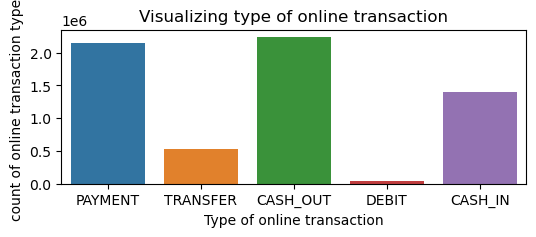

In [52]:
# Univariate Analysis
#visualize type of online transaction
plt.figure(figsize=(6,2))
sns.countplot(x='type',data=Fraud_D)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("count of online transaction type ")

From the chart, it is seen that cash_out and payment is the most common type of online transaction that customers use

<Axes: title={'center': 'Fraudulent Transactions'}, ylabel='count'>

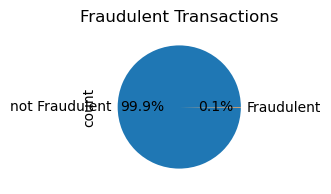

In [53]:
# create a function that properly labels isFraud

def Fraud (x):
    if x ==1:
        return "Fraudulent"
    else:
        return "not Fraudulent"
    
# create a new column
Fraud_D["fraud_transaction_label"] = Fraud_D["fraud_transaction"].apply(Fraud)


# create visualization
plt.figure(figsize = (6,2))
plt.title ("Fraudulent Transactions")
Fraud_D.fraud_transaction_label.value_counts().plot.pie(autopct='%1.1f%%')

From this chart, its shows that most of the online transactions customers does is not fraudulent. Also the dataset is not balance

In [54]:
Fraud_D.fraud_transaction_label.value_counts()

fraud_transaction_label
not Fraudulent    6354407
Fraudulent           8213
Name: count, dtype: int64

In [55]:
(8213/6354407)*100

0.129248881917699

### 8,213 transactions have been tagged as fraudulent in the dataset, which is approximately 13% of the total number of transactions.

<Axes: xlabel='step', ylabel='Density'>

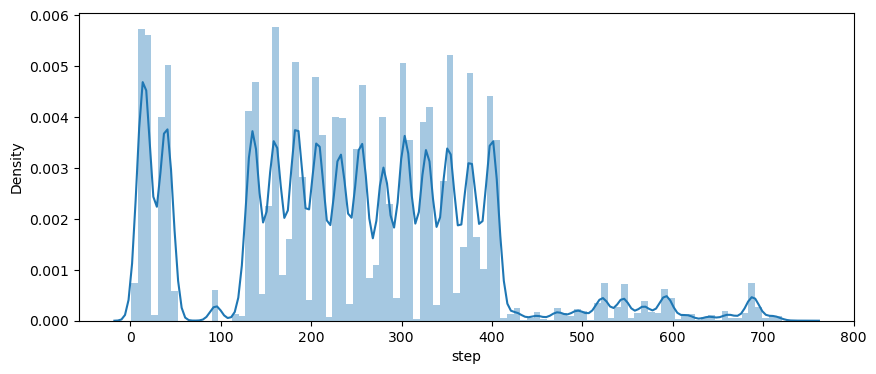

In [56]:
#To disable warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization for step column

plt.figure(figsize=(10,4))
sns.distplot(Fraud_D['step'],bins=100)

#### The above graph indicates the distribution of the step column

### Bivariate Analysis

<Axes: xlabel='type', ylabel='amount'>

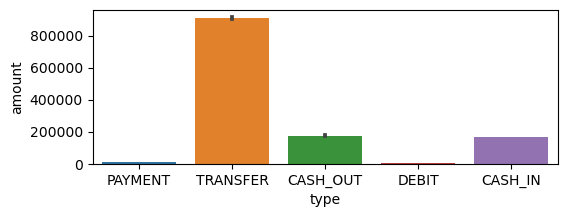

In [57]:
plt.figure(figsize=(6,2))
sns.barplot(x="type",y='amount',data=Fraud_D)

In this chart, 'transfer' type has the maximum amount of money being transfered from customers to the recipient. Although 'cash out' and 'payment' are the most common type of transactions

<Axes: xlabel='amount', ylabel='step'>

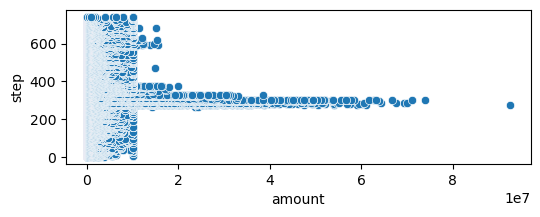

In [58]:
# Visualization between step and amount
plt.figure(figsize=(6,2))
sns.scatterplot(x=Fraud_D['amount'],y=Fraud_D['step'])

### Visualization between amount and fraud_transaction_label

Text(0, 0.5, 'fraud_transaction_label')

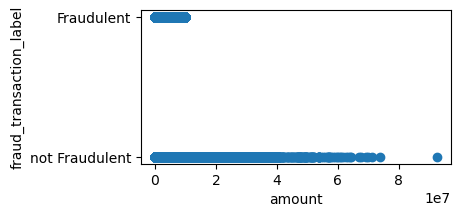

In [61]:
plt.figure(figsize=(4,2))
plt.scatter(x='amount',y='fraud_transaction_label',data=Fraud_D)
plt.xlabel('amount')
plt.ylabel('fraud_transaction_label')

Although the amount of fraudulent transactions is very low, majority of them are constituted within 0 and 10,000,000 amount.

### Visualization between type and isfraud_label

Text(0, 0.5, 'fraud_transaction_label')

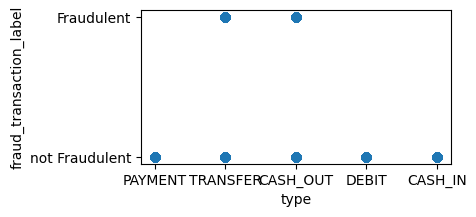

In [62]:
plt.figure(figsize=(4,2))
plt.scatter(x='type',y='fraud_transaction_label',data=Fraud_D)
plt.xlabel('type')
plt.ylabel('fraud_transaction_label')

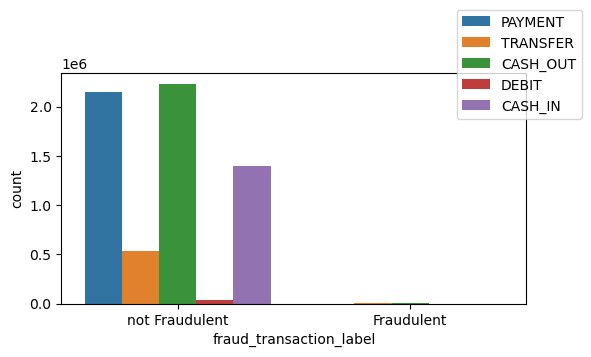

In [65]:
plt.figure(figsize=(6,3))
sns.countplot(x='fraud_transaction_label',data=Fraud_D,hue='type')
plt.legend(loc=[0.85,0.8])

***Both the above graphs indicate that transactions of the type 'transfer' and 'cash out' comprise fraudulent transactions***

### Multivariate Analysis

<Axes: xlabel='type', ylabel='step'>

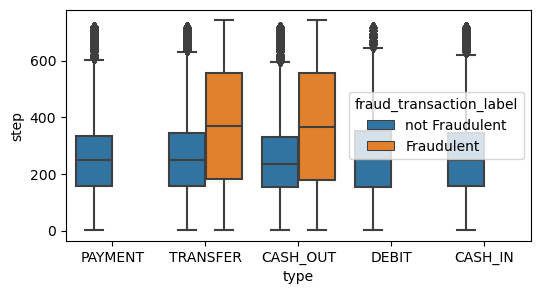

In [66]:
# Visualizing btw step,type and isFraud_label
plt.figure(figsize=(6,3))
sns.boxplot(x='type',y='step',hue='fraud_transaction_label',data=Fraud_D)

<Axes: >

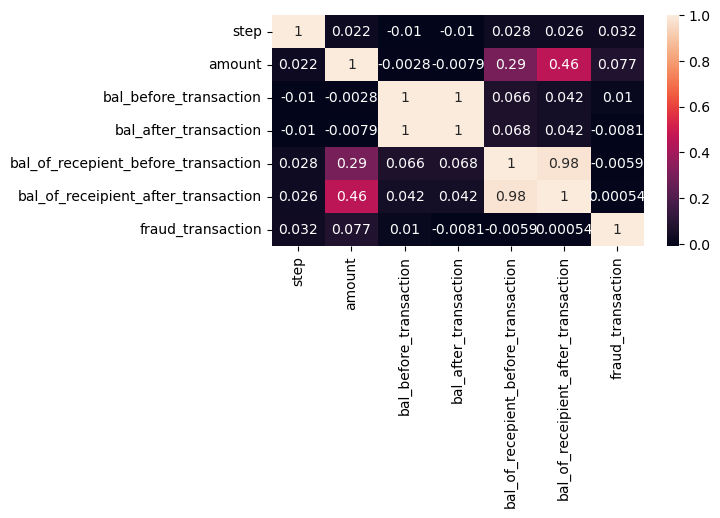

In [67]:
# Correlation
# Select only numeric columns
numeric_columns = Fraud_D.select_dtypes(include='number')

corel= numeric_columns.corr()
plt.figure(figsize=(6,3))
sns.heatmap(corel, annot =True)

summary of the correlation matrix :

Correlation with 'Step':
1. There's a weak positive correlation between 'Step' and 'Amount' (0.022).
2. There are very weak negative correlations between 'Step' and the balance-related variables ('Bal_Before_Transaction', 'Bal_After_Transaction', 'Bal_of_Recipient_Before_Transaction', 'Bal_of_Recipient_After_Transaction'), ranging from -0.010 to 0.028.
3. There's a weak positive correlation between 'Step' and 'Fraud_Transaction' (0.032).

Correlation with 'Amount':
1. There's a very weak positive correlation between 'Amount' and 'Step' (0.022).
2. 'Amount' shows weak positive correlations with 'Bal_of_Recipient_Before_Transaction' (0.294) and 'Bal_of_Recipient_After_Transaction' (0.459).
3. 'Amount' has a weak positive correlation with 'Fraud_Transaction' (0.077).

Correlation with Balance-related Variables:
1. 'Bal_Before_Transaction' and 'Bal_After_Transaction' have a very strong positive correlation (close to 1), indicating they are almost perfectly linearly related.
2. 'Bal_of_Recipient_Before_Transaction' and 'Bal_of_Recipient_After_Transaction' also have a very strong positive correlation, indicating a similar linear relationship as with the sender's balances.
3. There are weak positive correlations between balances and 'Amount', ranging from 0.042 to 0.459.
4. There are very weak positive or negative correlations with 'Step' and 'Fraud_Transaction'.

Correlation with 'Fraud_Transaction':
1. There's a weak positive correlation between 'Fraud_Transaction' and 'Amount' (0.077).
2. There are very weak positive or negative correlations with other variables.

### Encoding categorical variables

In [23]:
# One Hot Encoding
#1. select categorical variables

categorical = ['type']

#2. use pd.get_dummies() for one hot encoding
#replace pass with your code

categories_dummies = pd.get_dummies(Fraud_D[categorical])

#view what you have done
categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,False,False,True,False


In [68]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both data and categories_dummies as a list of their names
#pop out documentation for pd.concat() to clarify

Fraud_D = pd.concat([Fraud_D,categories_dummies], axis=1)

In [69]:
#remove the initial categorical columns now that we have encoded them
#use the list called categorical to delete all the initially selected columns at once

Fraud_D.drop(categorical, axis = 1, inplace = True)

Fraud_D.drop(columns=['fraud_transaction_label', 'customer_starting_transaction', 'recipient_of_transaction'], inplace=True)

### Model Selection, Training and Validation

### Select Target

In [27]:
y = Fraud_D.fraud_transaction

### Selecting Features

In [28]:
X = Fraud_D.drop(['fraud_transaction'], axis = 1)

### Import ML algorithms and initialize them

In [70]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [71]:
## Train test split( training on 80% while testing is 20%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [79]:
# Initialize models
LR = LogisticRegression(random_state=42)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)

In [80]:
#create list of your model names
models = [LR,KN,DC,RF]

In [81]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (4,2))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [82]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test, prediction))
    plot_confusion_matrix(y_test,prediction)


For LogisticRegression, Accuracy score is 0.9982687949303903 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270890
           1       0.36      0.43      0.39      1634

    accuracy                           1.00   1272524
   macro avg       0.68      0.71      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524



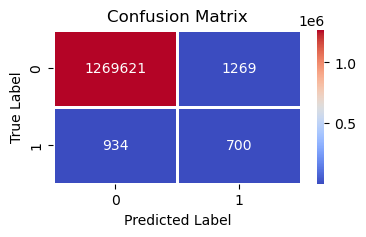


For KNeighborsClassifier, Accuracy score is 0.999444411264542 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270890
           1       0.86      0.68      0.76      1634

    accuracy                           1.00   1272524
   macro avg       0.93      0.84      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



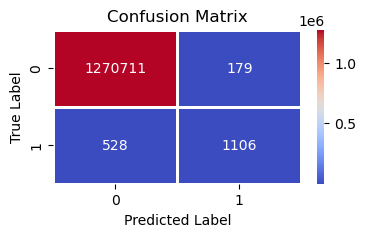


For DecisionTreeClassifier, Accuracy score is 0.9997123826348265 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270890
           1       0.90      0.88      0.89      1634

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



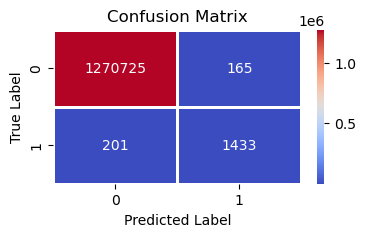


For RandomForestClassifier, Accuracy score is 0.9997060959164621 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270890
           1       0.98      0.79      0.87      1634

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



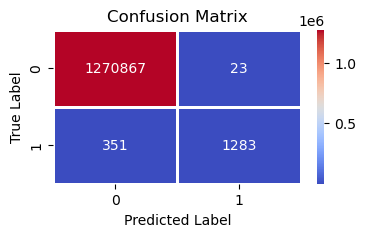

In [83]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)

### Interpretation of the result

***The Decision Tree model with default parameters yields 99.96% accuracy on training data.***

Precision Score: This means that 82% of all the things we predicted came true. that is 82% of clients transactions was detected to be a fraudulent transaction.

Recall Score: In all the actual positives, we only predicted 82% of it to be true.

***Random Forest Tree model with default parameters yields 99.97% accuracy on training data.***

Precision Score: This means that 99% of all the things we predicted came true. that is 99% of clients transactions was detected to be a fraudulent transaction.

Recall Score: In all the actual positives, we only predicted 81% of it to be true.

Both the Decision Tree and Random Forest models outperform the Logistic Regression and K-Nearest Neighbors model by a wide margin. Since they both have similar recall scores, we should perform a cross-validation of the two models so we may declare which is the best performer with more certainty.